In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [2]:
file = pd.read_csv('../Data/Dataset/stand.csv')
file.head()

timestamp  amplitude_sub0  amplitude_sub1  amplitude_sub2  \
0  2025-02-13 15:34:56:570091             0.0             0.0             0.0   
1  2025-02-13 15:34:56:671458             0.0             0.0             0.0   
2  2025-02-13 15:34:56:774875             0.0             0.0             0.0   
3  2025-02-13 15:34:56:990032             0.0             0.0             0.0   
4  2025-02-13 15:34:57:082019             0.0             0.0             0.0   

   amplitude_sub3  amplitude_sub4  amplitude_sub5  amplitude_sub6  \
0             0.0             0.0             0.0        0.003384   
1             0.0             0.0             0.0        0.000000   
2             0.0             0.0             0.0        0.002088   
3             0.0             0.0             0.0        0.000693   
4             0.0             0.0             0.0        0.003041   

   amplitude_sub7  amplitude_sub8  ...  phase_sub247  phase_sub248  \
0        0.001436        0.002270  ...     23.382092     22.008691   
1        0.001180        0.002951  ...     80.754115     84.483710   
2        0.002088        0.000819  ...    -14.715069    -14.656313   
3        0.001250        0.001250  ...    -10.318004    -11.035028   
4        0.000399        0.002824  ...     57.120963     57.166024   

   phase_sub249  phase_sub250  phase_sub251  phase_sub252  phase_sub253  \
0     24.631138     25.935682           0.0           0.0           0.0   
1     86.771048     84.020063           0.0           0.0           0.0   
2    -15.119961    -15.905359           0.0           0.0           0.0   
3    -10.995574    -13.012476           0.0           0.0           0.0   
4     56.465527     59.697780           0.0           0.0           0.0   

   phase_sub254  phase_sub255  label  
0           0.0           0.0  stand  
1           0.0           0.0  stand  
2           0.0           0.0  stand  
3           0.0           0.0  stand  
4           0.0           0.0  stand  

[5 rows x 514 columns]

# Process

In [3]:
df = file.iloc[:,1:257]
df

amplitude_sub0  amplitude_sub1  amplitude_sub2  amplitude_sub3  \
0                0.0             0.0             0.0             0.0   
1                0.0             0.0             0.0             0.0   
2                0.0             0.0             0.0             0.0   
3                0.0             0.0             0.0             0.0   
4                0.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
3168             0.0             0.0             0.0             0.0   
3169             0.0             0.0             0.0             0.0   
3170             0.0             0.0             0.0             0.0   
3171             0.0             0.0             0.0             0.0   
3172             0.0             0.0             0.0             0.0   

      amplitude_sub4  amplitude_sub5  amplitude_sub6  amplitude_sub7  \
0                0.0             0.0        0.003384        0.001436   
1                0.0             0.0        0.000000        0.001180   
2                0.0             0.0        0.002088        0.002088   
3                0.0             0.0        0.000693        0.001250   
4                0.0             0.0        0.003041        0.000399   
...              ...             ...             ...             ...   
3168             0.0             0.0        0.001450        0.000569   
3169             0.0             0.0        0.000759        0.001400   
3170             0.0             0.0        0.001420        0.000402   
3171             0.0             0.0        0.000909        0.000563   
3172             0.0             0.0        0.002899        0.002161   

      amplitude_sub8  amplitude_sub9  ...  amplitude_sub246  amplitude_sub247  \
0           0.002270        0.000479  ...          0.001395          0.002369   
1           0.002951        0.002247  ...          0.000835          0.004173   
2           0.000819        0.000409  ...          0.000916          0.004410   
3           0.001250        0.002022  ...          0.002326          0.003485   
4           0.002824        0.001694  ...          0.000565          0.005896   
...              ...             ...  ...               ...               ...   
3168        0.000900        0.000000  ...          0.000000          0.001991   
3169        0.001875        0.000720  ...          0.000866          0.000759   
3170        0.001171        0.001420  ...          0.000284          0.001024   
3171        0.000000        0.000252  ...          0.002949          0.003362   
3172        0.001366        0.001645  ...          0.001558          0.002327   

      amplitude_sub248  amplitude_sub249  amplitude_sub250  amplitude_sub251  \
0             0.001220          0.001070          0.001220               0.0   
1             0.001252          0.003009          0.000933               0.0   
2             0.002590          0.002088          0.000916               0.0   
3             0.003271          0.001734          0.000775               0.0   
4             0.004465          0.001263          0.003119               0.0   
...                ...               ...               ...               ...   
3168          0.000900          0.000636          0.000569               0.0   
3169          0.001519          0.001441          0.000960               0.0   
3170          0.002427          0.001024          0.001607               0.0   
3171          0.002078          0.000909          0.001690               0.0   
3172          0.002050          0.000306          0.001645               0.0   

      amplitude_sub252  amplitude_sub253  amplitude_sub254  amplitude_sub255  
0                  0.0               0.0               0.0               0.0  
1                  0.0               0.0               0.0               0.0  
2                  0.0               0.0               0.0               0.0  
3                  0.0    

In [4]:
def remove_subcarrier(amplitude):
    columns_to_remove =  ['amplitude_sub0', 'amplitude_sub1', 'amplitude_sub2', 'amplitude_sub3', 'amplitude_sub4', 'amplitude_sub5', 'amplitude_sub125', 'amplitude_sub126', 'amplitude_sub127', 'amplitude_sub128', 'amplitude_sub129', 'amplitude_sub251', 'amplitude_sub252', 'amplitude_sub253', 'amplitude_sub254', 'amplitude_sub255']
    
    return amplitude.drop(columns=columns_to_remove)

In [5]:
rem = remove_subcarrier(df)
rem.head()

amplitude_sub6  amplitude_sub7  amplitude_sub8  amplitude_sub9  \
0        0.003384        0.001436        0.002270        0.000479   
1        0.000000        0.001180        0.002951        0.002247   
2        0.002088        0.002088        0.000819        0.000409   
3        0.000693        0.001250        0.001250        0.002022   
4        0.003041        0.000399        0.002824        0.001694   

   amplitude_sub10  amplitude_sub11  amplitude_sub12  amplitude_sub13  \
0         0.001692         0.001220         0.001513         0.003946   
1         0.003847         0.001180         0.002086         0.003338   
2         0.002981         0.002047         0.000409         0.001638   
3         0.000000         0.000775         0.001734         0.001250   
4         0.004858         0.001786         0.001263         0.001997   

   amplitude_sub14  amplitude_sub15  ...  amplitude_sub241  amplitude_sub242  \
0         0.001220         0.000957  ...          0.001973          0.002911   
1         0.003038         0.001320  ...          0.001180          0.006203   
2         0.001295         0.000579  ...          0.002205          0.005131   
3         0.002022         0.000981  ...          0.002452          0.004965   
4         0.002259         0.001440  ...          0.001263          0.003767   

   amplitude_sub243  amplitude_sub244  amplitude_sub245  amplitude_sub246  \
0          0.003961          0.001914          0.001354          0.001395   
1          0.007672          0.002247          0.006532          0.000835   
2          0.002047          0.001295          0.001228          0.000916   
3          0.004928          0.002963          0.001961          0.002326   
4          0.004674          0.001597          0.001440          0.000565   

   amplitude_sub247  amplitude_sub248  amplitude_sub249  amplitude_sub250  
0          0.002369          0.001220          0.001070          0.001220  
1          0.004173          0.001252          0.003009          0.000933  
2          0.004410          0.002590          0.002088          0.000916  
3          0.003485          0.003271          0.001734          0.000775  
4          0.005896          0.004465          0.001263          0.003119  

[5 rows x 240 columns]

In [6]:
def readamp(removed):

    # converts element of dataframe to numeric value and due to 'coerece' non-numeric values is converted to NaN
    df = removed.apply(pd.to_numeric, errors='coerce')
    
    df = np.nan_to_num(df) # NaN is replaced with 0

    dfs = df[:, :]

    return dfs

In [7]:
amplitude = readamp(rem)
amplitude

array([[0.00338376, 0.00143561, 0.00226989, ..., 0.00122003, 0.00107004,
        0.00122003],
       [0.        , 0.00118028, 0.00295069, ..., 0.00125187, 0.00300912,
        0.00093309],
       [0.00208793, 0.00208793, 0.00081895, ..., 0.00258975, 0.00208793,
        0.00091562],
       ...,
       [0.00142011, 0.00040167, 0.00117105, ..., 0.00242668, 0.00102405,
        0.00160667],
       [0.0009085 , 0.00056343, 0.        , ..., 0.00207782, 0.0009085 ,
        0.00169029],
       [0.00289864, 0.00216052, 0.00136643, ..., 0.00204965, 0.00030554,
        0.0016454 ]])

In [8]:
def hampel(removed, k=11, t0=3, outliers_return=False):
    

    values = pd.Series(removed.copy())

    # Hampel Filter
    L = 1.4826

    rolling_median = values.rolling(k).median()
    difference = np.abs(rolling_median - values)
    median_abs_deivation = difference.rolling(k).median()

    threshold = t0 * L * median_abs_deivation
    outlier_idx = difference > threshold
    values[outlier_idx] = rolling_median

    if outliers_return:
        return values, outlier_idx

    return values

In [9]:
def dwt(hampeled, t1=0.25):
    threshold = t1

    hamp = hampeled.copy()

    window = pywt.Wavelet('sym5')
    max_level = pywt.dwt_max_level(hamp.shape[0], window.dec_len)

    coeffs = pywt.wavedec(hamp, 'sym5', level=max_level)

    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]), mode='soft')

    denoise = pywt.waverec(coeffs, 'sym5')

    return denoise

In [10]:
def filter(numeric):
    data = numeric.shape[0] # Finds No. of rows in the Numpy array
    res = np.zeros_like(numeric) # creates new array with same shape as data

    for i in range(numeric.shape[1]):
        res[:data, i] = dwt(hampel(numeric[:, i]))[:data] # replaces filtered data in same column
    
    return res

In [11]:
def hampel_all(num, k=11, t0=3):
    data = num.shape[0]
    
    res = np.zeros_like(num)
    outliers = []

    for i in range(num.shape[1]):
        res[:data, i], out = hampel(num[:, i], k, t0, outliers_return=True)[:data]
        outliers.append(out)
        
    return res, outliers

In [12]:
def dwt_all(num, t1=0.25):
    data = num.shape[0]

    res = np.zeros_like(num)

    for i in range(num.shape[1]):
        res[:data, i] = dwt(num[:, i], t1)[:data]
    
    return res

# Output

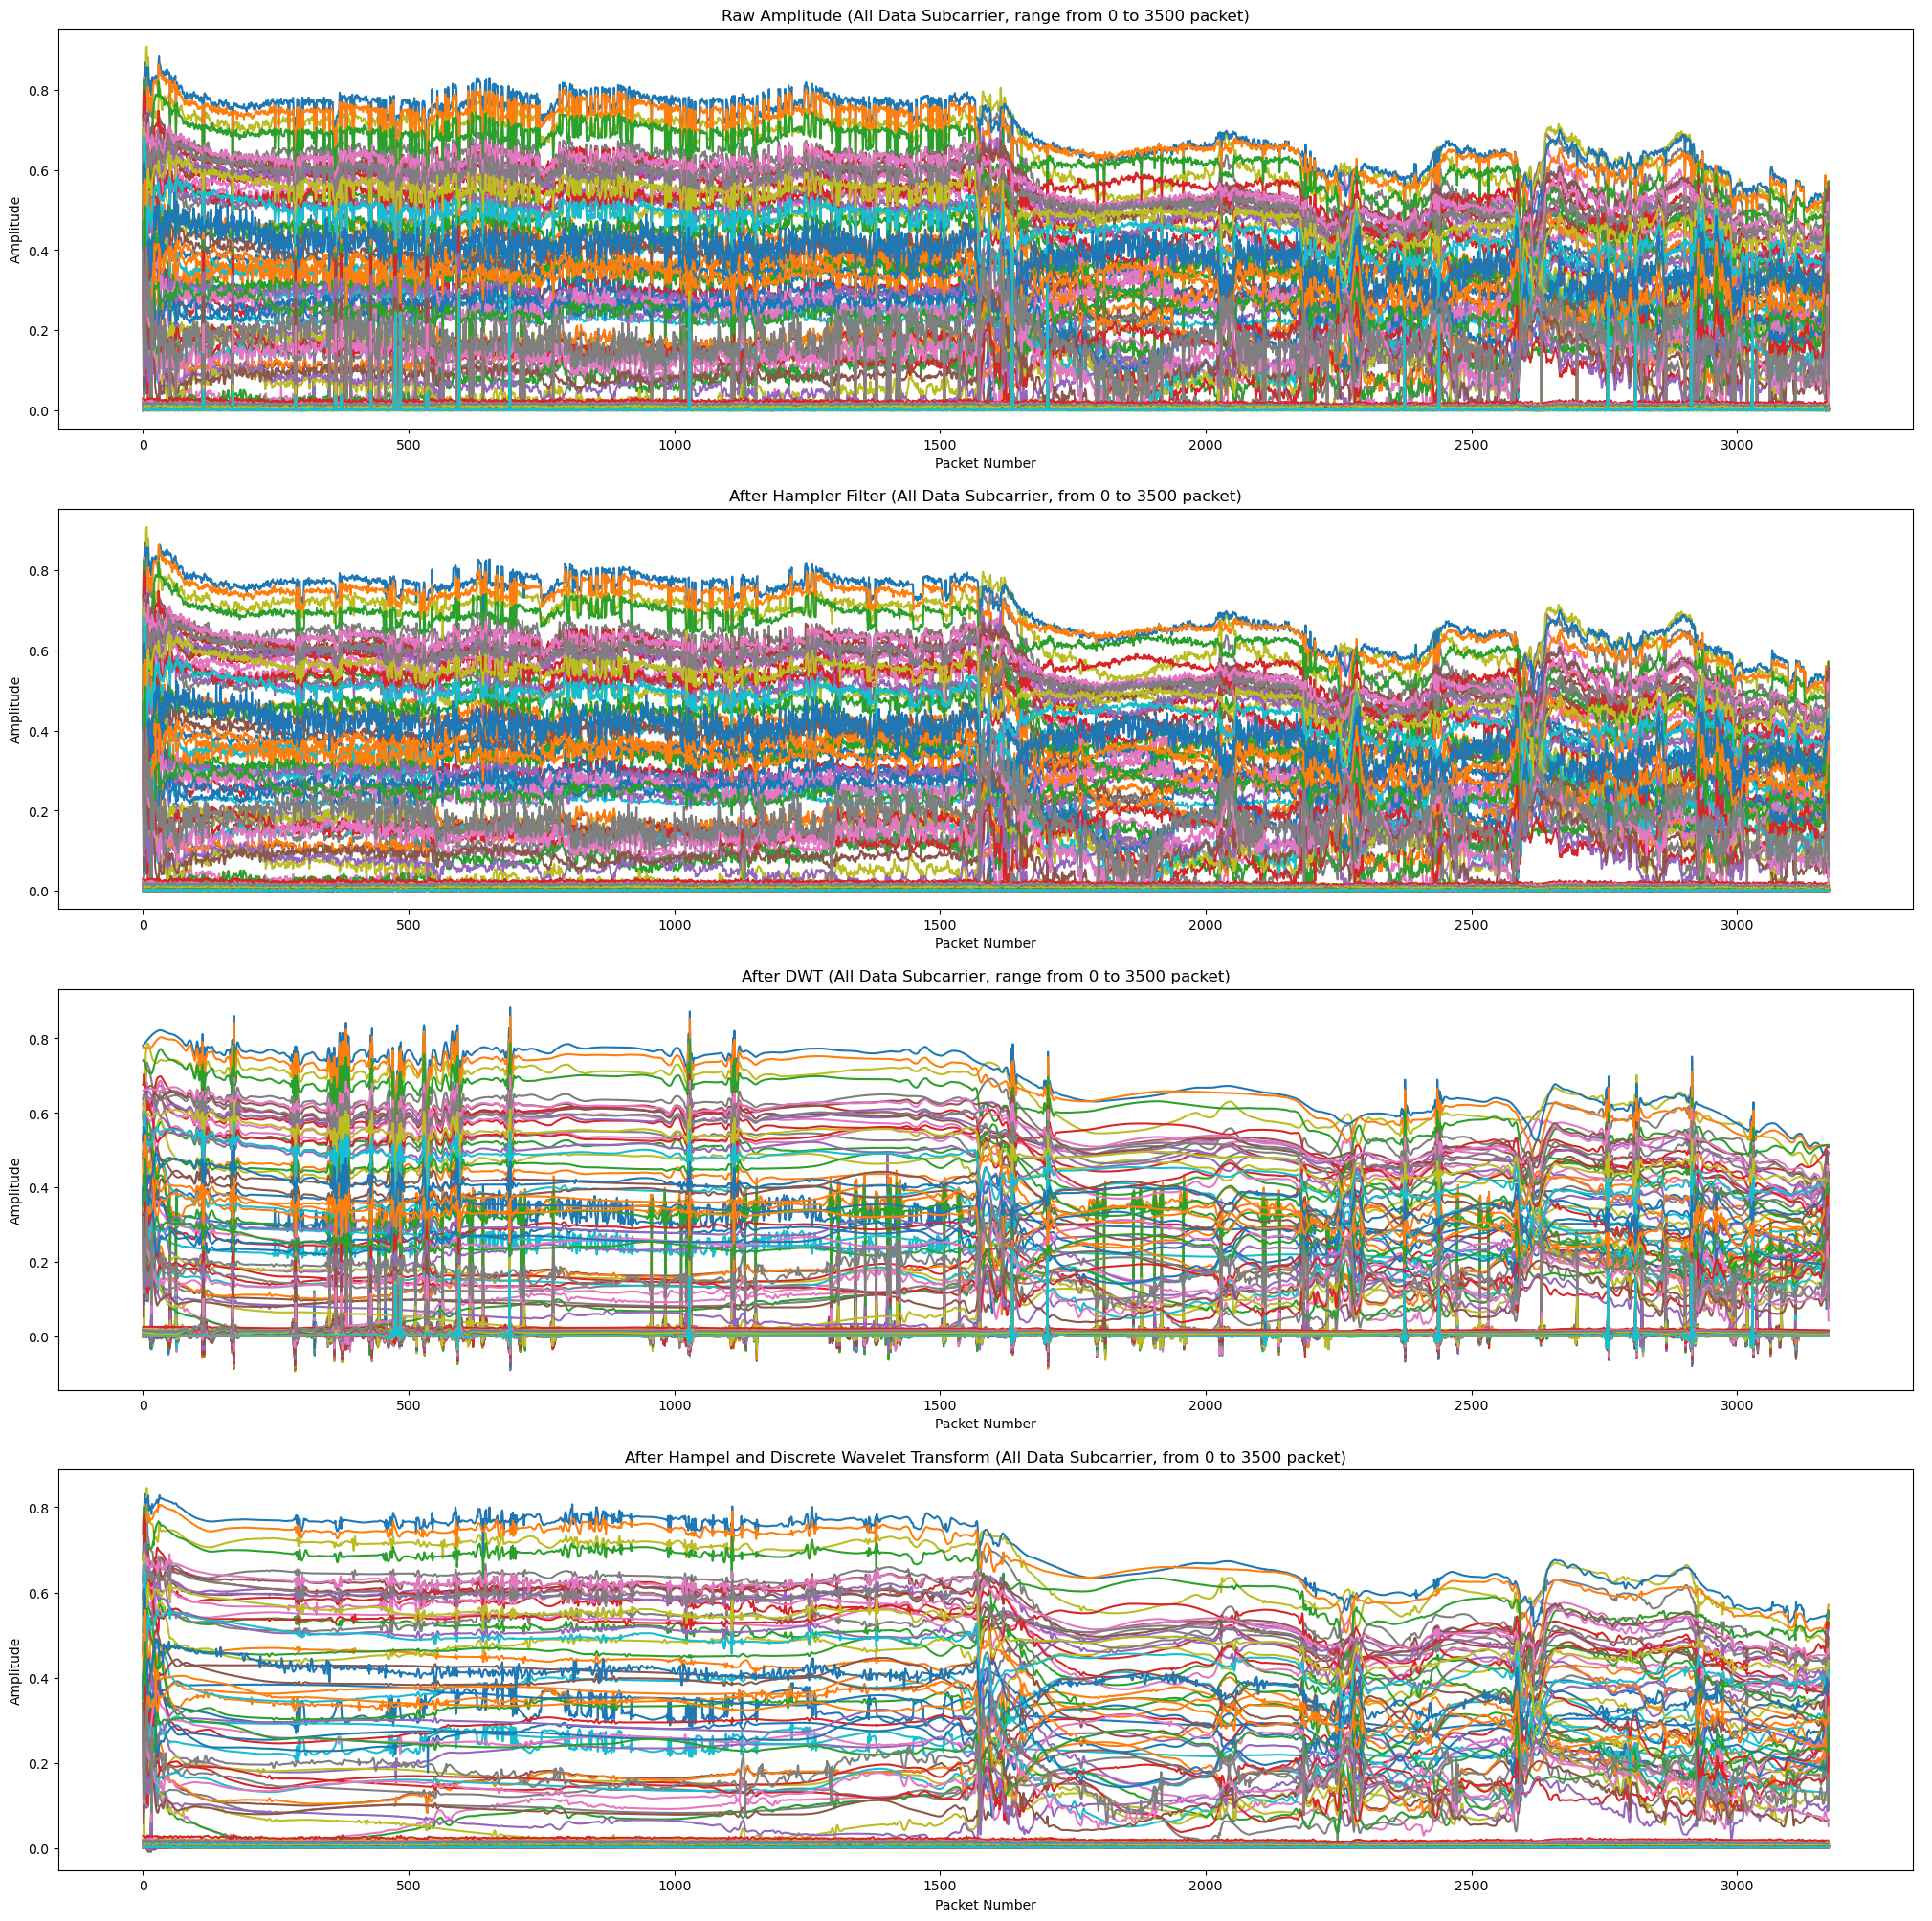

In [13]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(111)

no_filter = amplitude
with_hampel, outliers = hampel_all(no_filter)
dwt_filter = dwt_all(no_filter)
with_filter = filter(no_filter)

ax1 = fig.add_subplot(411)
plt.plot((no_filter)[:, :])
ax1.set_title("Raw Amplitude (All Data Subcarrier, range from 0 to 3500 packet)")

ax2 = fig.add_subplot(412)
plt.plot(with_hampel[:, :])
ax2.set_title("After Hampler Filter (All Data Subcarrier, from 0 to 3500 packet)")

ax3 = fig.add_subplot(413)
plt.plot(dwt_filter[:, :])
ax3.set_title("After DWT (All Data Subcarrier, range from 0 to 3500 packet)")

ax4 = fig.add_subplot(414)
plt.plot((with_filter)[:, :])
ax4.set_title("After Hampel and Discrete Wavelet Transform (All Data Subcarrier, from 0 to 3500 packet)")

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Packet Number')


ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Packet Number')

ax3.set_ylabel('Amplitude')
ax3.set_xlabel('Packet Number')

ax4.set_ylabel('Amplitude')
ax4.set_xlabel('Packet Number')

plt.show()